In [20]:
from helper import *

## Get the Data in the first cell. 

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [21]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

Lets's print the first 3 rows.

In [22]:
data = data_from_url(url)
count = 0
for row in data:
    if(count < 3):
        print(row)
    count += 1

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

In [23]:
print(len(data[0]))

6


In [24]:
len_row = len(data[0])
index = 0
for row in data:
    data[index] = row[:5]
    index += 1
print(data[:3])
    

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


In [25]:
for row in data:
    row[0] = fetch_year(row[0])
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


In [26]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]
years = []
for year in range(min_year, max_year + 1):
    years.append(year)
attempts_per_year = []
for year in years:
    attempts_per_year.append([year,0])
print(attempts_per_year)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


In [27]:
for row in data:
    for ya in attempts_per_year:
        if ya[0] == row[0]:
            ya[1] += 1
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


In which year did the most attempts at breaking out of prison with a helicopter occur?

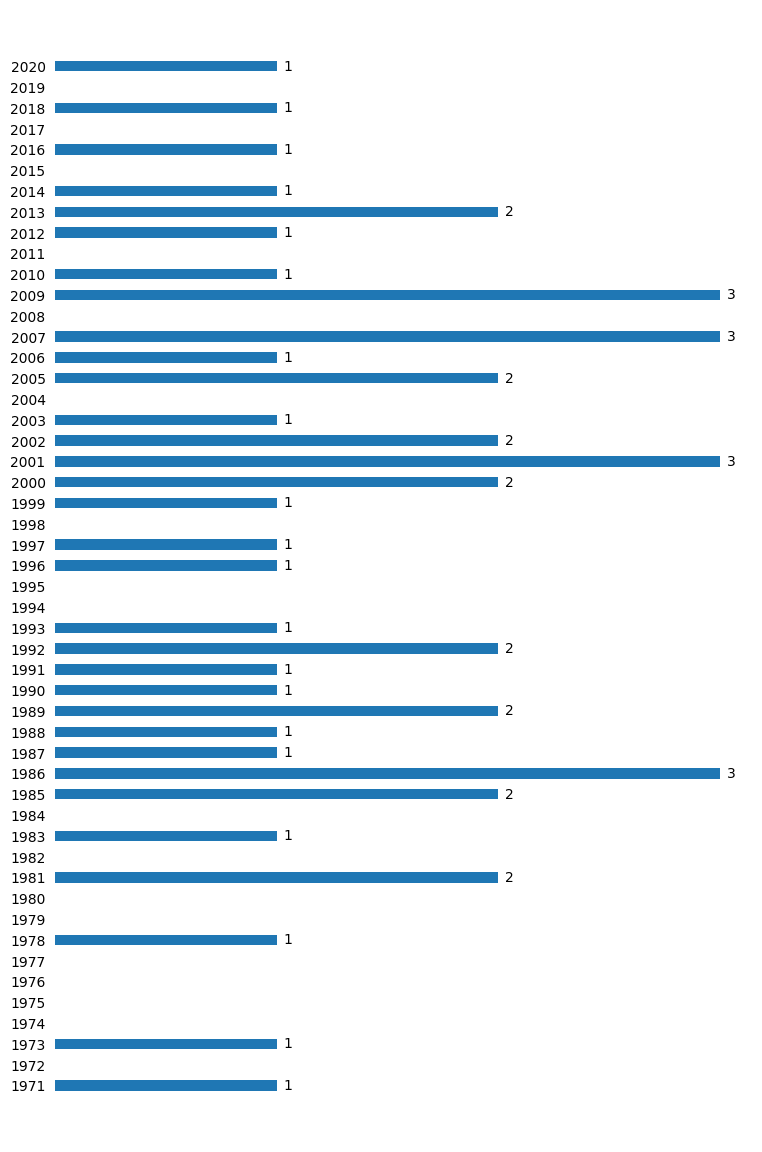

In [28]:
%matplotlib inline
barplot(attempts_per_year)


In [56]:
countries_frequency = df["Country"].value_counts()
#print(type(countries_frequency))
#print(countries_frequency)
print_pretty_table(countries_frequency)

Creating a List of countries with prison break attempts and number of attempts which succeeded. 

In [76]:
# List country_pr_brks [[<country>, <total_attempts>, <successful_attempts>]]
country_pr_brks = []
countries = []
count = 0
for row in data:
    if row[2] not in countries:
        countries.append(row[2])
        if row[3] == "Yes":
            country_pr_brks.append([row[2], 1, 1])
        else:
            country_pr_brks.append([row[2], 1, 0])
    elif row[2] in countries:
        index = countries.index(row[2])
        if row[3] == "Yes":
            country_pr_brks[index][2] += 1
            country_pr_brks[index][1] += 1
        else:
            country_pr_brks[index][1] += 1

#print(countries)
print(country_pr_brks)
    


[['Mexico', 1, 1], ['Ireland', 1, 1], ['United States', 8, 6], ['France', 15, 11], ['Canada', 4, 3], ['Australia', 2, 1], ['Brazil', 2, 2], ['Italy', 1, 1], ['United Kingdom', 2, 1], ['Puerto Rico', 1, 1], ['Chile', 1, 1], ['Netherlands', 1, 0], ['Greece', 4, 2], ['Belgium', 4, 2], ['Russia', 1, 1]]
